In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

print("all imports successful")

all imports successful


In [2]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
print("Target value counts:")
print(df['survived'].value_counts())

Target value counts:
survived
0    549
1    342
Name: count, dtype: int64


In [4]:
df[['survived', 'alive']].head(5)

,survived,alive
0,0,no
1,1,yes
2,1,yes
3,1,yes
4,0,no


In [5]:
# All cleaning in one place
df_clean = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].dropna()

X_lr = df_clean.drop('survived', axis=1)
y_lr = df_clean['survived']

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_lr_train, y_lr_train)

predictions = lr_model.predict(X_lr_test)
print(f"Accuracy: {accuracy_score(y_lr_test, predictions):.3f}")
print(f"\nPrecision: {precision_score(y_lr_test, predictions):.3f}")
print(f"\nRecall: {recall_score(y_lr_test, predictions):.3f}")
print(f"\nF1 Score: {f1_score(y_lr_test, predictions):.3f}")

Accuracy: 0.699

Precision: 0.667

Recall: 0.464

F1 Score: 0.547


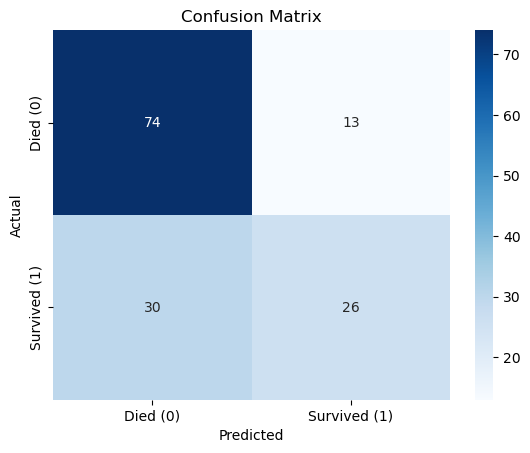

In [7]:
cm = confusion_matrix(y_lr_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Died (0)', 'Survived (1)'],
            yticklabels=['Died (0)', 'Survived (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../../visuals/daily_work_visuals/confusion_matrix_heatmap.png')
plt.show()